In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# How To Define Constants

In [2]:
PATH_TO_DATA = './data'
PATH_TO_DATASET_TABLE = './dataset.csv'

# IMAGE_SIZE = (3840, 2160) # (width, height) Ultra HD 4K
# IMAGE_SIZE = (1920, 1080) # (width, height) Full HD
IMAGE_SIZE = (511, 511)
FRAME_SIZE = (256, 256) # (frame_width, frame_height)
OVERLAY_SIZE = (1, 1) # (stride_y, stride_x)
BATCH_SIZE = 4
EPOCHS = 20

# How to Create Dataset Table

In [3]:
from utils import make_dataset_table, train_test_split

In [4]:
make_dataset_table(PATH_TO_DATA, PATH_TO_DATASET_TABLE)
train_test_split(PATH_TO_DATASET_TABLE, test_size=0.2)

# How To Use Transforms

In [5]:
from conversion_transforms import _ToTensor
from geometric_transforms import _RandomHorizontalFlip, _RandomVerticalFlip
from color_transforms import _ColorJitter

# How To Create Dataset With Different Type Of Transforms

In [6]:
from torchvision import transforms
from torch.utils.data import ConcatDataset

from dataset import DenoisingDataset

In [7]:
transforms = [transforms.Compose([_RandomHorizontalFlip(p=1.0), _ToTensor()]),
              transforms.Compose([_RandomVerticalFlip(p=1.0), _ToTensor()]),
              transforms.Compose([_ColorJitter(hue=0.5), _ToTensor()])]

train_dataset = []
for transform in transforms:
    dataset = DenoisingDataset(dataset=pd.read_csv(PATH_TO_DATASET_TABLE),
                               image_size=IMAGE_SIZE,
                               frame_size=FRAME_SIZE,
                               overlay_size=OVERLAY_SIZE,
                               phase='train',
                               transform=transform)
    train_dataset = ConcatDataset([train_dataset, dataset])

In [8]:
len(train_dataset)

12

# How To Create Dataloader

In [9]:
from torch.utils.data import DataLoader

In [10]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=False, # can be set to True only for train loader
                          num_workers=0)
print(len(train_loader))

3


# How To Train Model

In [11]:
import torch

from loss import SSIMLoss
from model import autoencoder
from train import train_model

In [12]:
model = autoencoder(3, 3)
loss = SSIMLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-3)

model = train_model(model, train_loader, loss, optimizer, num_epochs=EPOCHS)

Epoch 0/19:


100%|██████████| 3/3 [00:22<00:00,  7.49s/it]


Loss: 1.0070
Epoch 1/19:


100%|██████████| 3/3 [00:18<00:00,  6.27s/it]


Loss: 0.9980
Epoch 2/19:


100%|██████████| 3/3 [00:17<00:00,  5.73s/it]


Loss: 0.9909
Epoch 3/19:


100%|██████████| 3/3 [00:17<00:00,  5.82s/it]


Loss: 0.9840
Epoch 4/19:


100%|██████████| 3/3 [00:17<00:00,  5.91s/it]


Loss: 0.9628
Epoch 5/19:


100%|██████████| 3/3 [00:17<00:00,  5.89s/it]


Loss: 0.9071
Epoch 6/19:


100%|██████████| 3/3 [00:17<00:00,  5.92s/it]


Loss: 0.8959
Epoch 7/19:


100%|██████████| 3/3 [00:17<00:00,  5.77s/it]


Loss: 0.8691
Epoch 8/19:


100%|██████████| 3/3 [00:17<00:00,  5.80s/it]


Loss: 0.8449
Epoch 9/19:


100%|██████████| 3/3 [00:17<00:00,  5.70s/it]


Loss: 0.8152
Epoch 10/19:


100%|██████████| 3/3 [00:17<00:00,  5.68s/it]


Loss: 0.7845
Epoch 11/19:


100%|██████████| 3/3 [00:17<00:00,  5.70s/it]


Loss: 0.7648
Epoch 12/19:


100%|██████████| 3/3 [00:17<00:00,  5.76s/it]


Loss: 0.7414
Epoch 13/19:


100%|██████████| 3/3 [00:17<00:00,  5.73s/it]


Loss: 0.6222
Epoch 14/19:


100%|██████████| 3/3 [00:17<00:00,  5.72s/it]


Loss: 0.5640
Epoch 15/19:


100%|██████████| 3/3 [00:17<00:00,  5.69s/it]


Loss: 0.5496
Epoch 16/19:


100%|██████████| 3/3 [00:17<00:00,  5.68s/it]


Loss: 0.5379
Epoch 17/19:


100%|██████████| 3/3 [00:17<00:00,  5.75s/it]


Loss: 0.5105
Epoch 18/19:


100%|██████████| 3/3 [00:17<00:00,  5.72s/it]


Loss: 0.5039
Epoch 19/19:


100%|██████████| 3/3 [00:17<00:00,  5.71s/it]


Loss: 0.4912


# How To Visualize Result

### Image Reading

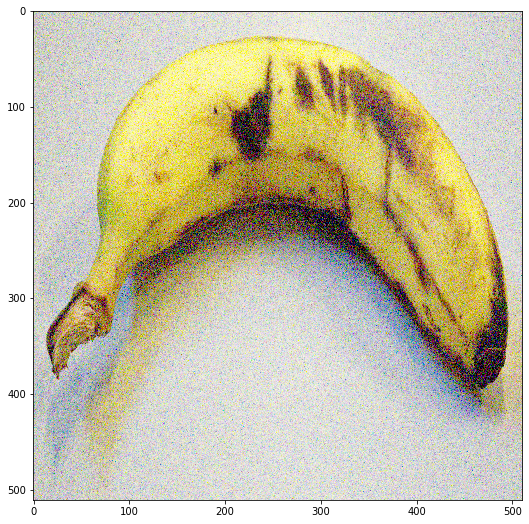

In [13]:
t = pd.read_csv(PATH_TO_DATASET_TABLE)
image = Image.open(t[t['phase']=='train'].iloc[0]['image']).resize(IMAGE_SIZE) # PIL Image
np_image = np.array(image) # numpy array from PIL Image

plt.figure(figsize=(9, 9))
plt.imshow(np_image);

### Image Slicing

In [14]:
from utils import slicing, plot_sliced_image
frames, overlay_mask = slicing(np_image)

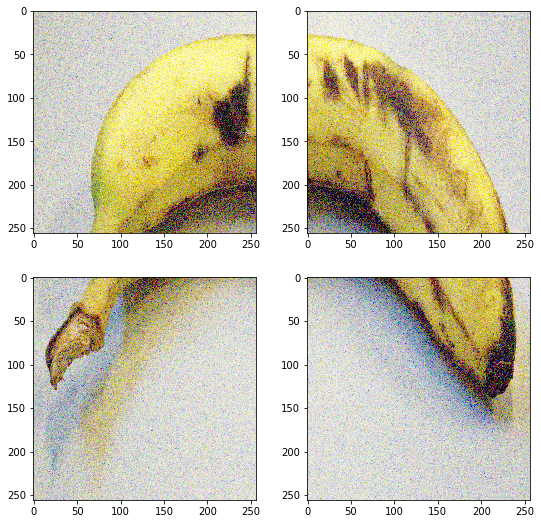

In [15]:
plot_sliced_image(frames, IMAGE_SIZE, FRAME_SIZE, OVERLAY_SIZE, figsize=(9, 9))

### Image Prediction

In [16]:
from utils import get_predicted_frames

In [17]:
predicted_frames = get_predicted_frames(model, frames)

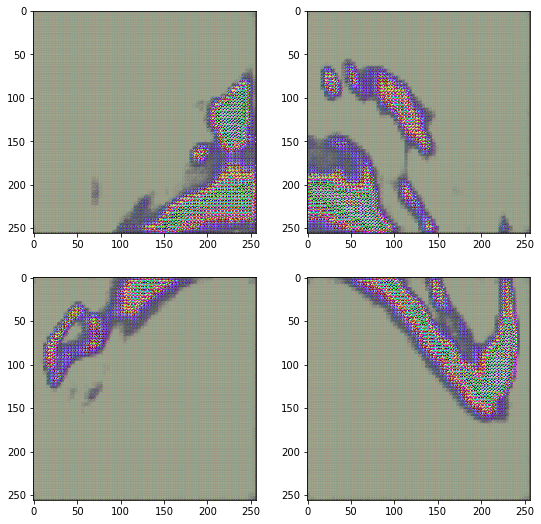

In [18]:
plot_sliced_image(predicted_frames, IMAGE_SIZE, FRAME_SIZE, OVERLAY_SIZE, figsize=(9, 9))

### Image Gluing

In [19]:
from utils import plot_glued_image

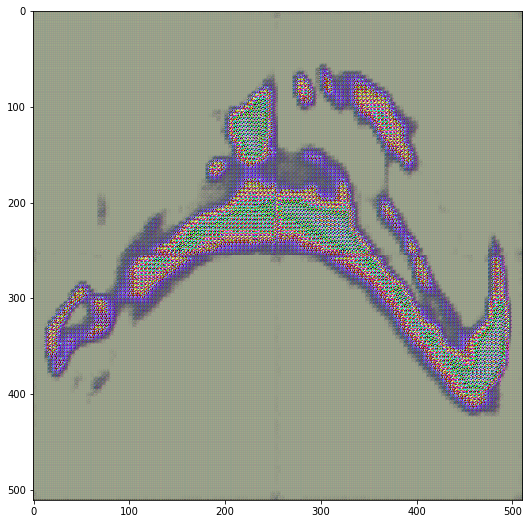

In [20]:
plot_glued_image(predicted_frames, overlay_mask, OVERLAY_SIZE, figsize=(9, 9))